# **UBER FARE PREDICTION**

**Dataset**

train.csv - Input features and target fare_amount values for the training set (about 50k rows).

test.csv - Input features for the test set (about 10K rows). 

Our goal is to predict fare_amount for each row.


In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
train_df=pd.read_csv(r"/content/drive/MyDrive/Internship/train.csv",nrows=5000)
test_df=pd.read_csv(r"/content/drive/MyDrive/Internship/test.csv")
print (train_df.shape)
print (train_df.columns)
print (test_df.shape)
print (test_df.columns)

(5000, 8)
Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')
(9914, 7)
Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                5000 non-null   object 
 1   fare_amount        5000 non-null   float64
 2   pickup_datetime    5000 non-null   object 
 3   pickup_longitude   5000 non-null   float64
 4   pickup_latitude    5000 non-null   float64
 5   dropoff_longitude  5000 non-null   float64
 6   dropoff_latitude   5000 non-null   float64
 7   passenger_count    5000 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


Here we can see there are 8columns in which 6 numerics and 2 are object.

Lets change the type of pickup_datetime from object to DateTime


In [6]:
train_df["pickup_datetime"]=pd.to_datetime(train_df['pickup_datetime'])

In [7]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
#Eliminate rows where the pickup and drop location points are same

train_df=train_df[np.logical_and(train_df['pickup_longitude'] != train_df['dropoff_longitude'],
                                     train_df['pickup_latitude'] != train_df['dropoff_latitude'])]

In [9]:
train_df.shape

(4854, 8)

##As this is Taxi fare data and we know there are many factors which affect the price of taxi like 
1. Travelled distance
2. Time of Travel
3. Demand and Availability of Taxi
4. Some special places are more costlier like Airport or other places where there might be toll


In [10]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000
mean,11.286080,-73.843349,40.646672,-73.857864,40.655458,1.635146
std,9.387824,3.553808,3.081680,3.392022,3.025428,1.262958
min,-2.900000,-74.438233,-73.991840,-74.185996,-73.979010,0.000000
25%,6.000000,-73.992784,40.735493,-73.991541,40.735771,1.000000
50%,8.500000,-73.982282,40.752653,-73.980571,40.754238,1.000000
75%,12.900000,-73.968490,40.767280,-73.965553,40.768063,2.000000
max,165.000000,40.751582,41.366138,40.758867,41.032598,6.000000


##Here first thing which we can see is minimum value of fare is negative which is -62 which is not the valid value, so we need to remove the fare which are negative values.
#Secondly, passenger_count minimum value is 0 and maximum value is 208 which impossible, so we need to remove them as well, for safer side we can think that a taxi can have maximum 7 people.


In [11]:
#replace 0 with NA in the variables and convert the data wherever required for further operations

train_df['fare_amount']= train_df['fare_amount'].apply(pd.to_numeric, errors='coerce')
train_df['fare_amount']= train_df['fare_amount'].replace({0:np.nan})
train_df['passenger_count']=train_df['passenger_count'].fillna(0)
train_df['passenger_count']= train_df['passenger_count'].astype(int)
train_df['passenger_count']=train_df['passenger_count'].replace({0: np.nan})
train_df['pickup_longitude']= train_df['pickup_longitude'].replace({0:np.nan})
train_df['pickup_latitude']= train_df['pickup_latitude'].replace({0:np.nan})
train_df['dropoff_longitude']= train_df['dropoff_longitude'].replace({0:np.nan})
train_df['dropoff_latitude']= train_df['dropoff_latitude'].replace({0:np.nan})

##Here we can see there are  null values in passanger_count,pickup_latitude, pickup_logitude, drop_off latitude and longitude. As removing some rows from our huge dataset will not affect our analysis so, lets remove the rows having null values 


In [12]:
#calculate missing values

missing_val = pd.DataFrame(train_df.isnull().sum())
#print(missing_val)

#Reset index
missing_val = missing_val.reset_index()
#print(missing_val)

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'count'})
#print(missing_val)

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['count']/len(train_df)*100)
#print(missing_val)

#sort in descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
print(missing_val)

           Variables  count  Missing_percentage
0    passenger_count     16            0.329625
1   pickup_longitude      3            0.061805
2    pickup_latitude      3            0.061805
3  dropoff_longitude      2            0.041203
4   dropoff_latitude      2            0.041203
5                key      0            0.000000
6        fare_amount      0            0.000000
7    pickup_datetime      0            0.000000


In [13]:
train_df.dropna(inplace=True)
print(train_df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [14]:
train_df.shape

(4833, 8)

## **OUTLIER ANALYSIS**

In [15]:
#save the data with in another place with different name

df = train_df.copy()
train_df = train_df.copy()

In [16]:
# irregular fare_amount are converted to NA 

train_df.loc[train_df['fare_amount']<0 , 'fare_amount']=np.nan
train_df.loc[train_df['fare_amount'] > 30, 'fare_amount']=np.nan
train_df=train_df.dropna()

In [17]:
#irregular passenger counts or those wgich are greater then 8 convertet to NaN
train_df.loc[train_df['passenger_count'] > 8,'passenger_count'] = np.nan

In [18]:
#save numeric data names
coutliers = [ 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
for list in coutliers:
    #Detect and replace with NA
    #Extract quartiles
    q75, q25 = np.percentile(train_df[list], [75 ,25])

    #Calculate IQR
    iqr = q75 - q25
   
    # #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)

    # #Replace with NA
    train_df.loc[train_df[list] < minimum,list] = np.nan
    train_df.loc[train_df[list] > maximum,list] = np.nan

    # #Calculate missing value
    missing_val = pd.DataFrame(train_df.isnull().sum())

In [19]:
#As Mean is the best method, we impute missing values/ in this case outlier values with mean

train_df['pickup_longitude'] = train_df['pickup_longitude'].fillna(train_df['pickup_longitude'].mean())
train_df['pickup_latitude'] = train_df['pickup_latitude'].fillna(train_df['pickup_latitude'].mean())
train_df['dropoff_longitude'] = train_df['dropoff_longitude'].fillna(train_df['dropoff_longitude'].mean())
train_df['dropoff_latitude'] = train_df['dropoff_latitude'].fillna(train_df['dropoff_latitude'].mean())

#imputed with mode for categorical variables
train_df['passenger_count'] = train_df['passenger_count'].fillna(int(train_df['passenger_count'].mode()))

In [20]:
#convert the data type of categorical variable passenger count
train_df['passenger_count']=train_df['passenger_count'].astype('int')
train_df['passenger_count']=train_df['passenger_count'].astype('category')

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


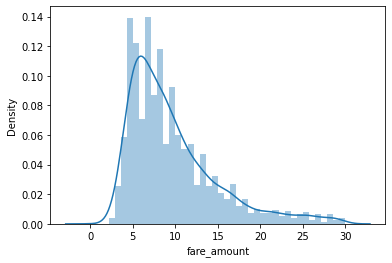

In [22]:
sns.distplot(train_df['fare_amount'])

##In distribution plot also it can be seen that there are some values which are negative fare


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


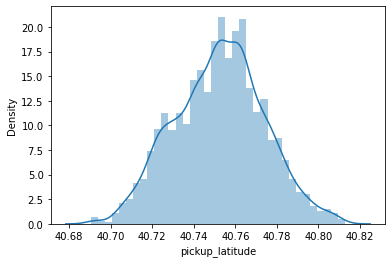

In [23]:
sns.distplot(train_df['pickup_latitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


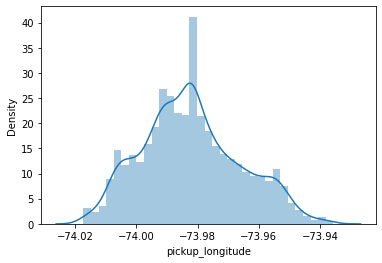

In [24]:
sns.distplot(train_df['pickup_longitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


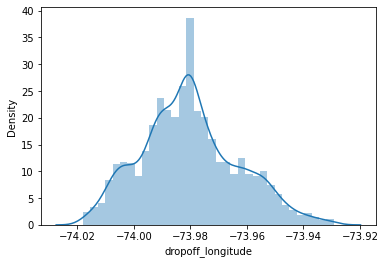

In [25]:
sns.distplot(train_df['dropoff_longitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


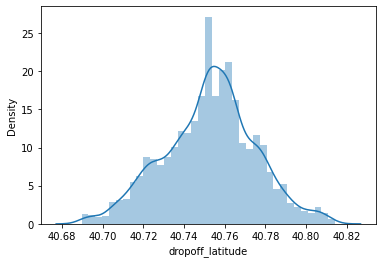

In [26]:
sns.distplot(train_df['dropoff_latitude'])

In [27]:
print("drop_off latitude min value",test_df["dropoff_latitude"].min())
print("drop_off latitude max value",test_df["dropoff_latitude"].max())
print("drop_off longitude min value", test_df["dropoff_longitude"].min())
print("drop_off longitude max value",test_df["dropoff_longitude"].max())
print("pickup latitude min value",test_df["pickup_latitude"].min())
print("pickup latitude max value",test_df["pickup_latitude"].max())
print("pickup longitude min value",test_df["pickup_longitude"].min())
print("pickup longitude max value",test_df["pickup_longitude"].max())

drop_off latitude min value 40.568973
drop_off latitude max value 41.696683
drop_off longitude min value -74.263242
drop_off longitude max value -72.990963
pickup latitude min value 40.573143
pickup latitude max value 41.709555
pickup longitude min value -74.252193
pickup longitude max value -72.986532


###we can see what is range of latitude and longitude of our test dataset, lets keep the range same in our train set so that even noisy data is remove and we have only the values which belongs to new york


In [28]:
min_longitude=-74.263242,
min_latitude=40.573143,
max_longitude=-72.986532, 
max_latitude=41.709555

In [29]:
tempdf=train_df[(train_df["dropoff_latitude"]<min_latitude) | (train_df["pickup_latitude"]<min_latitude) | (train_df["dropoff_longitude"]<min_longitude) | (train_df["pickup_longitude"]<min_longitude) | (train_df["dropoff_latitude"]>max_latitude) | (train_df["pickup_latitude"]>max_latitude) | (train_df["dropoff_longitude"]>max_longitude) | (train_df["pickup_longitude"]>max_longitude) ]
print("before droping",train_df.shape)
train_df.drop(tempdf.index,inplace=True)
print("after droping",train_df.shape)

before droping (4598, 8)
after droping (4598, 8)


## **Absolute distance**
 As critical information, we use the pickup and dropoff locations to build new columns with the absolute longitudinal distances and the absolute distance traveled.

In [74]:
def add_abs_distances(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    df['abs_distance'] = np.sqrt(np.square(df.abs_diff_longitude) + np.square(df.abs_diff_latitude))
    return df

train_df = add_abs_distances(train_df)

In [75]:
train_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year,abs_diff_longitude,abs_diff_latitude,abs_distance
0,4.5,-73.982172,40.721319,-73.980329,40.712278,1,15,17,1,6,2009,0.001843,0.009041,0.009227
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,0.036780,0.070701,0.079696
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,0.008504,0.010708,0.013674
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,0.004437,0.024949,0.025340
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,0.011440,0.015754,0.019470


In [122]:
import matplotlib.pyplot as plt

In [123]:
def multi_scatter_plot(df, features, target):
    
    def single_plot(df, xlabel, ylabel):
        x = df[xlabel]
        fig, axes = plt.subplots(figsize=(6, 4))
        axes.scatter(x, y, alpha=.3)
        axes.set(xlabel=xlabel, ylabel=ylabel)
        axes.legend()
        plt.tight_layout()
        plt.show()
    
    def double_plot(df, x_labels, ylabel):
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        for i, xlabel in enumerate(x_labels):
            x = df[xlabel]
            axes[i].scatter(x, y, alpha=.3)
            axes[i].set(xlabel=xlabel, ylabel=ylabel)
            axes[i].legend()
        plt.tight_layout()
        plt.show()
    
    def multi_plot(df, x_labels, ylabel):
        n = len(x_labels)//2
        fig, axes = plt.subplots(n, 2, figsize=(12, 4*n))
        count=0
        for i in range(n):
            for j in range(2):
                xlabel = x_labels[count]
                x = df[xlabel]
                axes[i][j].scatter(x, y, alpha=.3)
                axes[i][j].set(xlabel=xlabel, ylabel=ylabel)
                axes[i][j].legend()
                count += 1
        plt.tight_layout()
        plt.show()
    
    y = df[target]
    ylabel = target
    x_labels = features
    
    if len(x_labels)==1:
        xlabel = x_labels[0]
        single_plot(df, xlabel, ylabel)
        
    elif len(x_labels)==2:
        double_plot(df, x_labels, ylabel)
        
    elif len(x_labels)==3:
        double_plot(df, x_labels[:2], ylabel)
        single_plot(df, x_labels[-1], ylabel)
        
    else:
        multi_plot(df, x_labels, ylabel)
        if len(x_labels)%2!=0:           
            single_plot(df, x_labels[-1], ylabel)
            

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


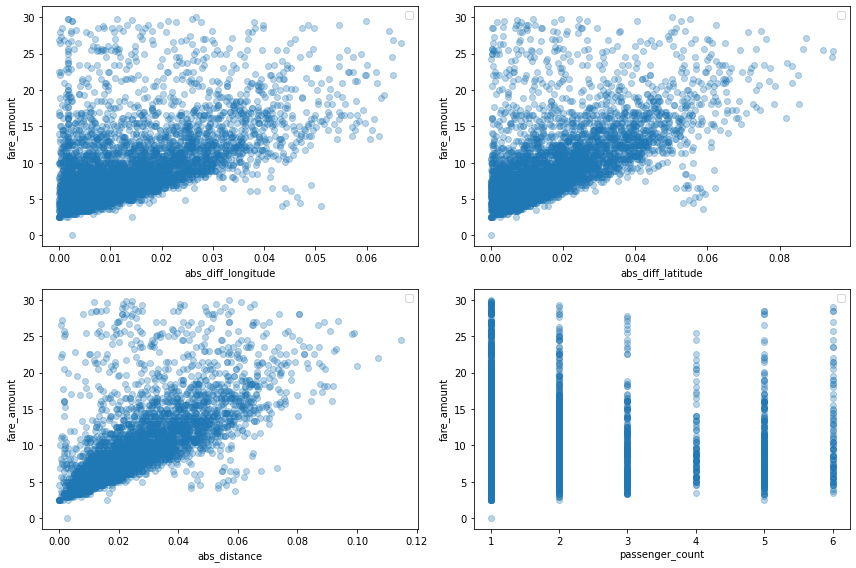

In [124]:
features = ['abs_diff_longitude', 'abs_diff_latitude', 'abs_distance', 'passenger_count']
target = 'fare_amount'
multi_scatter_plot(train_df, features, target)

##On different day and time there would be different price like during evening price would be more compare to afternoon, during christmas price would be different and similarly on weekends price would be different compare to week days. so lets create some extra features which will take care of all these things


In [30]:
import calendar
train_df['day']=train_df['pickup_datetime'].apply(lambda x:x.day)
train_df['hour']=train_df['pickup_datetime'].apply(lambda x:x.hour)
train_df['weekday']=train_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train_df['month']=train_df['pickup_datetime'].apply(lambda x:x.month)
train_df['year']=train_df['pickup_datetime'].apply(lambda x:x.year)


In [31]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.982172,40.721319,-73.980329,40.712278,1,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,Tuesday,3,2010


In [32]:
train_df.weekday = train_df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4598 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                4598 non-null   object             
 1   fare_amount        4598 non-null   float64            
 2   pickup_datetime    4598 non-null   datetime64[ns, UTC]
 3   pickup_longitude   4598 non-null   float64            
 4   pickup_latitude    4598 non-null   float64            
 5   dropoff_longitude  4598 non-null   float64            
 6   dropoff_latitude   4598 non-null   float64            
 7   passenger_count    4598 non-null   category           
 8   day                4598 non-null   int64              
 9   hour               4598 non-null   int64              
 10  weekday            4598 non-null   int64              
 11  month              4598 non-null   int64              
 12  year               4598 non-null   int64        

In [34]:
train_df.drop(["key","pickup_datetime"], axis=1, inplace=True)

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4598 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   fare_amount        4598 non-null   float64 
 1   pickup_longitude   4598 non-null   float64 
 2   pickup_latitude    4598 non-null   float64 
 3   dropoff_longitude  4598 non-null   float64 
 4   dropoff_latitude   4598 non-null   float64 
 5   passenger_count    4598 non-null   category
 6   day                4598 non-null   int64   
 7   hour               4598 non-null   int64   
 8   weekday            4598 non-null   int64   
 9   month              4598 non-null   int64   
 10  year               4598 non-null   int64   
dtypes: category(1), float64(5), int64(5)
memory usage: 559.8 KB


##**Linear correlation**
Next, let's compute the correlation matrix to identify those features that are most correlated with the target and those that are most correlated to each other. The former type corresponds to the best predictors and the latter type those that introduce multicollinearity. For two variables,  x  and  y , the formula is as follows

∑i,j(xi−x¯))(yj−y¯)/σ iσ j 

We do this just after separating a test data set, and use the train data set only, so as not to involve the test data set in any feature selection procedures.

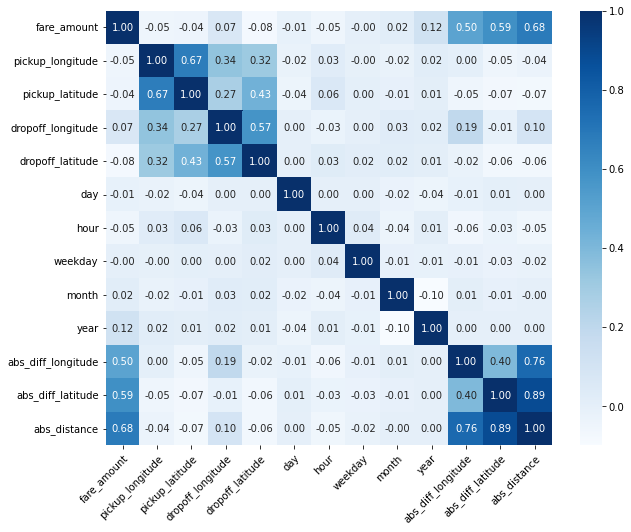

In [76]:
def corr_heatmap(df):
    corr_data = df.corr()
    fig, ax = plt.subplots(figsize=(10,8))
    # Add title
    #plt.title(title, fontsize=12)
    # Heatmap showing the amount of genomes with the same MIC for each MIC, by antibiotic
    sns.heatmap(corr_data, annot=corr_data, cmap='Blues', cbar=True, fmt='.2f')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    plt.show()
    
corr_heatmap(train_df)


##lets divide the data set into train and validation test set


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x=train_df.drop("fare_amount", axis=1)
y=train_df['fare_amount']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [79]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year,abs_diff_longitude,abs_diff_latitude,abs_distance
691,-73.979982,40.762695,-73.962557,40.804685,1,7,0,2,7,2009,0.017425,0.041990,0.045462
4749,-73.985657,40.738266,-74.004349,40.742195,6,25,2,4,6,2015,0.018692,0.003929,0.019101
1602,-73.975297,40.752142,-73.994269,40.745782,1,6,7,4,11,2014,0.018972,0.006360,0.020010
985,-73.984950,40.759487,-73.970597,40.694542,6,27,23,4,12,2012,0.014353,0.064945,0.066512
2701,-74.005536,40.741006,-74.015577,40.709957,1,12,20,5,4,2013,0.010041,0.031049,0.032632


In [80]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year,abs_diff_longitude,abs_diff_latitude,abs_distance
3089,-74.012033,40.715330,-74.011588,40.716130,1,22,0,5,11,2013,0.000445,0.000800,0.000915
2132,-73.989093,40.778335,-73.982759,40.779166,1,24,13,3,6,2009,0.006334,0.000831,0.006388
3220,-73.964004,40.757010,-73.957582,40.768733,1,3,22,5,9,2010,0.006422,0.011723,0.013367
1961,-73.967963,40.764812,-73.948088,40.778895,1,26,17,1,4,2010,0.019875,0.014083,0.024359
1738,-73.982236,40.756820,-73.982447,40.722452,1,11,22,5,5,2012,0.000211,0.034368,0.034369


In [81]:
x_train.shape

(3678, 13)

In [82]:
x_test.shape

(920, 13)

## ***DECISION TREE REGRESSOR***

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
# Divide the data into train and test
train1, test1 = train_test_split(train_df, test_size=0.2)

In [90]:
# Decision tree for regression
fit_DT = DecisionTreeRegressor(random_state=0)
fit_DT.fit(train1.iloc[:, 11:14], train1.iloc[:,0])

DecisionTreeRegressor(random_state=0)

In [92]:
#Apply model on test data
predictions_DT = fit_DT.predict((test1).iloc[:,11:14])

In [95]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [96]:
MAPE(test1.iloc[:,0], predictions_DT)

33.13470818849844

## ***LINEAR REGRESSION***

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [99]:
predictedvalues = lrmodel.predict(x_test)

In [100]:
#lets calculate rmse for linear Regression model
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)


RMSE value for Linear regression is 3.443052709063628


In [57]:
#Import libraries for LR
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [131]:
# Train the model using the training sets
model = sm.OLS(x_train.iloc[:, 0].astype(float), x_train.iloc[:, 1:12].astype(float)).fit()

In [103]:
#Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       pickup_longitude   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.486e+09
Date:                Sun, 05 Dec 2021   Prob (F-statistic):                        0.00
Time:                        15:11:12   Log-Likelihood:                          10080.
No. Observations:                3678   AIC:                                 -2.014e+04
Df Residuals:                    3667   BIC:                                 -2.007e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
pickup_latitude        0.3768      0.013     28.894      0.000       0.351       0.402
dropoff_longitude      0.9343      0.006    145.725      0.000       0.922       0.947
dropoff_latitude      -0.4522      0.012    -38.857      0.000      -0.475      -0.429
passenger_count        0.0001      0.000      0.599      0.549      -0.000       0.001
day                -1.647e-05   2.99e-05     -0.551      0.582   -7.51e-05    4.22e-05
hour                 7.89e-05   3.98e-05      1.985      0.047    9.53e-07       0.000
weekday             -5.67e-05      0.000     -0.439      0.661      -0.000       0.000
month                 -0.0002    7.6e-05     -2.741      0.006      -0.000   -5.93e-05
year                  -0.0009      0.000     -6.500      0.000      -0.001      -0.001
abs_diff_longitude    -0.2551      0.023    -10.940      0.000      -0.301      -0.209
abs_diff_latitude      0.0318      0.018      1.721      0.085      -0.004       0.068
==============================================================================
Omnibus:                      112.037   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.333
Skew:                           0.196   Prob(JB):                     1.59e-50
Kurtosis:                       4.159   Cond. No.                     1.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
# make the predictions by the model
predictions_LR = model.predict(x_test.iloc[:,1:12])

In [118]:
#Calculate MAPE
LR_mape=MAPE(x_test.iloc[:,0], predictions_LR)

In [132]:
LR_mape

0.01505519789060181

## ***RANDOM FOREST REGRESSION***

In [106]:
#Lets see with Random Forest and calculate its rmse
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [107]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)


In [109]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)


RMSE value for Random forest regression is  3.3391734170202634


# **PREDICTION ON ORIGINAL TEST DATA**

In [110]:
#haversine function

def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
   
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [111]:
test_df=pd.read_csv(r"/content/drive/MyDrive/Internship/test.csv")

In [114]:
#create Dist variable
test_df['dist'] = haversine( test_df['pickup_latitude'], test_df['pickup_longitude'],
                 test_df['dropoff_latitude'], test_df['dropoff_longitude'])

test_df['fare_amount']=0
test_df['passenger_count']=test_df['passenger_count'].astype('category')

In [115]:
# Build model on the entire Train data
RF_model = RandomForestRegressor(n_estimators = 10).fit(train_df.iloc[:, 1:7], train_df.iloc[:,0])

#predict value
test_df['fare_amount'] = RF_model.predict(test_df.iloc[:,2:8])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dist
Feature names seen at fit time, yet now missing:
- day

  warnings.warn(message, FutureWarning)


In [116]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,fare_amount
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,7.84
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,8.44
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,6.13
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,7.84
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,14.01


In [117]:
#write output to csv

test_df.to_csv("Predicted_Values.csv", index = False)